In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
final_data = pd.read_csv('data/final_data.csv')

In [7]:
final_data.head()

,year,life_ladder,log_gdp_per_capita,social_suppoprt,healthy_life_exp_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,pop_density,suicide_rate,country,region,continent,PC1,PC2,PC3
0,2008.0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,40.518221,4.6,Afghanistan,Southern Asia,Asia,-3.906165,1.520131,-0.403055
1,2009.0,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,41.987193,4.4,Afghanistan,Southern Asia,Asia,-3.044270,1.529720,-0.043639
2,2010.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,43.220447,4.3,Afghanistan,Southern Asia,Asia,-2.923549,1.409665,-0.416828
3,2011.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,44.844851,4.1,Afghanistan,Southern Asia,Asia,-3.564866,1.328797,-0.505837
4,2012.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,46.711251,4.0,Afghanistan,Southern Asia,Asia,-3.196211,1.868501,-0.106653


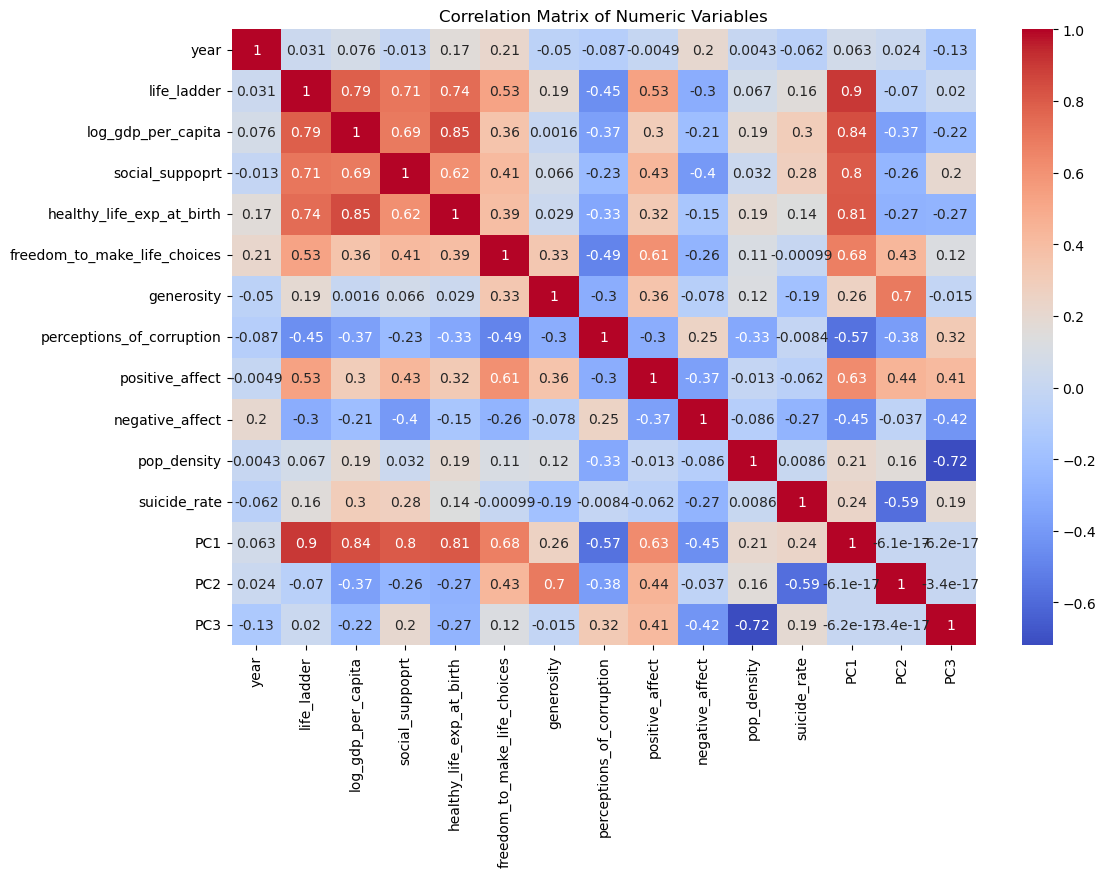

In [8]:
#Selecting only the numeric columns for correlation analysis
numeric_data = final_data.select_dtypes(include=['float64', 'int64'])

#Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

#Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In [10]:
#Finding pairs of variables with absolute correlation >= 0.7
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.7:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
            high_corr_pairs.append(pair)

high_corr_pairs

[('log_gdp_per_capita', 'life_ladder', 0.7886076475457454),
 ('social_suppoprt', 'life_ladder', 0.7102138864686037),
 ('healthy_life_exp_at_birth', 'life_ladder', 0.7426154190524673),
 ('healthy_life_exp_at_birth', 'log_gdp_per_capita', 0.8521453431482364),
 ('PC1', 'life_ladder', 0.900021046059184),
 ('PC1', 'log_gdp_per_capita', 0.8421708609205832),
 ('PC1', 'social_suppoprt', 0.7996357470795068),
 ('PC1', 'healthy_life_exp_at_birth', 0.8107325293720301),
 ('PC3', 'pop_density', -0.7198499670607986)]

In [12]:
print("Correlations >= 0.7:")
print()

for pair in high_corr_pairs:
    print(f"{pair[0]} & {pair[1]}: {pair[2]}")

Correlations >= 0.7:

log_gdp_per_capita & life_ladder: 0.7886076475457454
social_suppoprt & life_ladder: 0.7102138864686037
healthy_life_exp_at_birth & life_ladder: 0.7426154190524673
healthy_life_exp_at_birth & log_gdp_per_capita: 0.8521453431482364
PC1 & life_ladder: 0.900021046059184
PC1 & log_gdp_per_capita: 0.8421708609205832
PC1 & social_suppoprt: 0.7996357470795068
PC1 & healthy_life_exp_at_birth: 0.8107325293720301
PC3 & pop_density: -0.7198499670607986


When looking at the correlations we can ignore the correlations with PC values because they are expected to correlate with some variables. The main key take here is that **log_gdp_per_capita**, **social_suppoprt** and **healthy_life_exp_at_birth** are strongly correlated with **life_ladder** and including those three in a model could lead to multicollinearity. Also healthy_life_exp_at_birth and log_gdp_per_capita are strongly correlated with each other.